# **1. Project: Titanic (Classification)**

# **2. Requirements**

## 2.1 Group Members

1. Sangeetha Babu
2. Parshva Kotak

## 2.2 Problem Formulation/Introduction

1) [1] The Titanic, one of the largest and most luxurious ocean liners ever built, departed Southampton, England, on its maiden voyage across the Atlantic Ocean on April 10 1912. The Titanic was designed by the Irish shipbuilder William Pirrie and built in Belfast and it was considered unsinkable. After stopping at Cherbourg, France, and Queenstown, Ireland, to pick up some final passengers, the massive vessel set out at full speed for New York City.  At 2:20 a.m. on April 15, 1912, Titanic sank into the North Atlantic Ocean about 400 miles south of Newfoundland, Canada. The Titanic which carried 2,224 people (passengers and crew), had struck an iceberg two and half hours before. Only 722 people survived the shipwreck.


In this project our aim is to use the Titanic passenger data like name, age, sex, pclass etc. and try to predict who will survive and who will not survive.While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. For this we need to answer the question ‘what sorts of people were more likely to survive?’ using the given data.

2) Data population: The passengers and the crew members that were on the Titanic when it sank.

## 2.3 Data

### 2.3.1 Kaggle Account Names:
Sangeetha Babu

Parshva Kotak

<font color='green'>Team Name: #Titanic#Novice#SP#</font>

### 2.3.2 Data Set and its description:
Data files given:
*   training set (train.csv)
*   gender_submission.csv
*   test set (test.csv)

The training set is used to build the machine learning model. For the training set, we are provided with the outcome (also known as the “ground truth”) for each passenger whether the passenger survived the shipwreck or not. The model will be based on features like passengers’ age, gender, class and number of family members who accompanied them onboard (SibSp, Parch columns).

gender_submission.csv file is a sample file with a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

The test set is used to see how well the model performs on unseen data. For the test set, we are not provided with the ground truth for each passenger. Our machine learning model will predict the outcome for the test set in the same format given in gender_submission.csv.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/TCSS 551 BDA/TCSS 551 BDA Project/

/content/drive/MyDrive/TCSS 551 BDA/TCSS 551 BDA Project


In [4]:
train_datafile = "train.csv"
with open(train_datafile, 'r') as f:
  for i in range(20):
    print(i, '\t', repr(f.readline()))

0 	 'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n'
1 	 '1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n'
2 	 '2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n'
3 	 '3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n'
4 	 '4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\n'
5 	 '5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\n'
6 	 '6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\n'
7 	 '7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\n'
8 	 '8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\n'
9 	 '9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\n'
10 	 '10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\n'
11 	 '11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\n'
12 	 '12,1,1,"Bonnell, M

In [5]:
train = pd.read_csv(train_datafile, sep=',')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_datafile = "test.csv"
with open(test_datafile, 'r') as f:
  for i in range(20):
    print(i, '\t', repr(f.readline()))

0 	 'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n'
1 	 '892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\n'
2 	 '893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\n'
3 	 '894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\n'
4 	 '895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\n'
5 	 '896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\n'
6 	 '897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\n'
7 	 '898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\n'
8 	 '899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\n'
9 	 '900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\n'
10 	 '901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S\n'
11 	 '902,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S\n'
12 	 '903,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S\n'
13 	 '904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",fe

In [7]:
test = pd.read_csv(test_datafile, sep=',')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
submission_datafile = "gender_submission.csv"
with open(submission_datafile, 'r') as f:
  for i in range(20):
    print(i, '\t', repr(f.readline()))

0 	 'PassengerId,Survived\n'
1 	 '892,0\n'
2 	 '893,1\n'
3 	 '894,0\n'
4 	 '895,0\n'
5 	 '896,1\n'
6 	 '897,0\n'
7 	 '898,1\n'
8 	 '899,0\n'
9 	 '900,1\n'
10 	 '901,0\n'
11 	 '902,0\n'
12 	 '903,0\n'
13 	 '904,1\n'
14 	 '905,0\n'
15 	 '906,1\n'
16 	 '907,1\n'
17 	 '908,0\n'
18 	 '909,0\n'
19 	 '910,1\n'


In [9]:
submissionFormat = pd.read_csv(submission_datafile, sep=',')
submissionFormat.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### 2.3.3 Data Wrangling:

Now that we have loaded the data, we want to understand the properties of Data like Structure, Granularity, Scope, Temporality and Faithfulness. Let us examine the data for each of the above mentioned properties.

a) Structure: We want to look at the structure/format of the data and understand if this structure is good enough to apply the machine learning model to obtain desired results. 

<font color="green">We have already viewed and loaded training data. Fields are comma separated and records are delimited by newline (\r\n). The data types of each attribute is displayed in the below cell. The data is in rectangular/tabular format. The attributes' data can be either Quantitative or Categorical. If the data is Categorical, then it can either be Ordinal or Nominal. After analyzing the data, we have placed the attributes to one of the following categories.</font>

<font color="green">Quantitative: Age, SibSp, Parch, Fare</font>

<font color="green">Categorical:</font>

<font color="green">  -> Ordinal: Pclass</font>

<font color="green">  -> Nominal: PassengerId, Survived, Name, Sex, Ticket, Embarked</font>

In [10]:
print(train.dtypes)
train.head()

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


b) Granularity: It means what each record in the data represents. Here in train.csv and test.csv, each record represents a passenger aboard the Titanic when the ship sank. The primary key for the data is the "PassengerId" column.


In [11]:
# The below line uniquely identifies a particular passenger with PassengerId = 3
train[train['PassengerId']==3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


c) Scope: It is the data population for a problem. Here we have been provided with 891 records in train.csv and 418 records in test.csv which sums it to 1309 records in total that is provided for analysis and test. We do know that the total number of people aboard the Titanic during the shipwreck was 2224. 

The data provided is the subset of the data population of the problem and it is representative of the problem.

In [12]:
trow, tcol = train.shape
print("Total rows in training data (train.csv): %d" %(trow))
trow, tcol = test.shape
print("Total rows in test data (test.csv): %d" %(trow))

Total rows in training data (train.csv): 891
Total rows in test data (test.csv): 418


d) Temporality: It is the time when the data was collected. Here in train.csv and test.csv, date when the data was collected is not mentioned. But since this event has been widely reseached and studied, we are assuming the data provided was a mix of data collected from the ticket info, data collected from the relatives of people who didn't survive the shipwreck and the data collected from people who survived the shipwreck.


e) <font color="green">Faithfulness: We trust the data that was provided because this shipwreck was one infamous event in the history of time and is still widely talked and researched upon. We did cross check the numbers mentioned in the problem with other websites like Wikipedia[2], Britannica[3] where it did sync well.

<font color="green">After analyzing the data, we didn't find any unrealistic values for any column.</font>

<font color="green">We also want to identify the missing values in the data and see if we can update or remove them without loosing the important features of the data.</font>

*   <font color="green">Column Cabin has empty values for 687 out of 891 rows.</font>
*   <font color="green">Column Embarked has empty values for 2 rows.</font>
*   <font color="green">Column Age has empty values for 177 rows.</font>

In [13]:
trow, tcol = train.shape
print("Total rows in training data: %d" %(trow))
print("*****************************************************")
for column_name in train.columns.values:
  row, col = train[train[column_name].isna()].shape
  print("Number of empty values in Column: %s = %d" %(column_name, row))
print("*****************************************************")
row, col = train[train.isna().any(axis=1)].shape
print("Number of rows with 1 or more empty values for columns = %d" %(row))

Total rows in training data: 891
*****************************************************
Number of empty values in Column: PassengerId = 0
Number of empty values in Column: Survived = 0
Number of empty values in Column: Pclass = 0
Number of empty values in Column: Name = 0
Number of empty values in Column: Sex = 0
Number of empty values in Column: Age = 177
Number of empty values in Column: SibSp = 0
Number of empty values in Column: Parch = 0
Number of empty values in Column: Ticket = 0
Number of empty values in Column: Fare = 0
Number of empty values in Column: Cabin = 687
Number of empty values in Column: Embarked = 2
*****************************************************
Number of rows with 1 or more empty values for columns = 708


In [14]:
print('Number of records with Age less than 0 or greater than 120 is %d' %(train[(train['Age'] < 0) | (train['Age'] > 120)].shape[0]))
print('Number of records with Pclass value other than 1, 2 or 3 is %d' %(train[(train['Pclass'] != 1) & (train['Pclass'] != 2) & (train['Pclass'] != 3)].shape[0]))
print('Number of records with Sex value other than male and female is %d' %(train[(train['Sex'] != 'male') & (train['Sex'] != 'female')].shape[0]))
print('Min-Max value of SibSp: %d-%d' %(train.SibSp.min(), train.SibSp.max()))
print('Min-Max value of Parch: %d-%d' %(train.Parch.min(), train.Parch.max()))
print('Number of records with Fare less than 0 is %d' %(train[train['Fare'] < 0].shape[0]))
print('Number of records with Embarked value other than C, Q or S is %d' %(train[(train['Embarked'] != 'C') & (train['Embarked'] != 'Q') & (train['Embarked'] != 'S') & (train['Embarked'].isna()==False)].shape[0]))
passengerGrpBy = train.groupby('PassengerId').agg(count=('Name', 'value_counts'))
print('Number of records with duplicate PassengerIds is %d' %(passengerGrpBy[passengerGrpBy['count'] > 1].shape[0]))

Number of records with Age less than 0 or greater than 120 is 0
Number of records with Pclass value other than 1, 2 or 3 is 0
Number of records with Sex value other than male and female is 0
Min-Max value of SibSp: 0-8
Min-Max value of Parch: 0-6
Number of records with Fare less than 0 is 0
Number of records with Embarked value other than C, Q or S is 0
Number of records with duplicate PassengerIds is 0


### 2.3.4 EDA and Visualization

Here we are aiming to visualize data and draw some insights that could help us identify important features for the machine learning model.

Insight drawn from every plot is added inline with the code.

<font color='green'>Representativeness of the Data: Data population for this problem are the passengers and the crew members that were on the Titanic when it sank. Here we have been provided with 891 records in train.csv and 418 records in test.csv which sums it to 1309 records in total that is provided for analysis and test. We do know that the total number of people aboard the Titanic during the shipwreck was 2224. The data given for this problem is a subset of the Data population and we believe the sampling method used is Simple Random Sampling. So the data is representative of the population.</font>

In [15]:
trow, tcol = train.shape
print("Total rows in training data (train.csv): %d" %(trow))
trow, tcol = test.shape
print("Total rows in test data (test.csv): %d" %(trow))

Total rows in training data (train.csv): 891
Total rows in test data (test.csv): 418


In [16]:
trainData = train.copy()

In [17]:
#Assigning mean values to Age with na
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [18]:
values=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','>110']
conditions = [(train['Age'] >= 0.0) & (train['Age'] <= 10.0), 
              (train['Age'] > 10.0) & (train['Age'] <= 20.0), 
              (train['Age'] > 20.0) & (train['Age'] <= 30.0), 
              (train['Age'] > 30.0) & (train['Age'] <= 40.0), 
              (train['Age'] > 40.0) & (train['Age'] <= 50.0), 
              (train['Age'] > 50.0) & (train['Age'] <= 60.0), 
              (train['Age'] > 60.0) & (train['Age'] <= 70.0), 
              (train['Age'] > 70.0) & (train['Age'] <= 80.0), 
              (train['Age'] > 80.0) & (train['Age'] <= 90.0),
              (train['Age'] > 90.0) & (train['Age'] <= 100.0),
              (train['Age'] > 100.0) & (train['Age'] <= 110.0),
              (train['Age'] > 110.0)]

Survived,0,1,Total
Family,,,
0,374.0,163.0,537.0
1,72.0,89.0,161.0
2,43.0,59.0,102.0
3,8.0,21.0,29.0
4,12.0,3.0,15.0
5,19.0,3.0,22.0
6,8.0,4.0,12.0
7,6.0,0.0,6.0
10,7.0,0.0,7.0


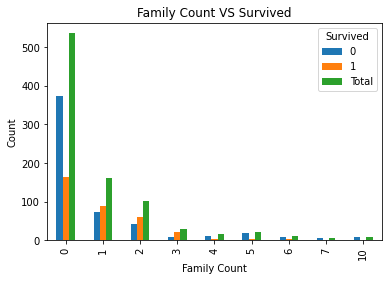

In [19]:
train6=train.copy()
train6['Family']=train6['SibSp'] + train6['Parch']
train6 = train6.groupby('Family').agg(count=('Survived', 'value_counts'))
train6 = train6.reset_index()
train6 = train6.pivot(index='Family', columns='Survived', values='count')
train6[train6.isnull()] = 0
train6['Total'] = train6[0] + train6[1]
plot1 = train6.reset_index().plot(kind='bar', x="Family", y=[0,1,'Total'])
plot1.set_xlabel('Family Count')
plot1.set_ylabel('Count')
plot1.set_title('Family Count VS Survived')
plot1.set_visible(True)
train6

# As the count of family members increases, i.e., greater than 3, count of survived decreases to 0
# Number of people who came alone overall had survived more than the others who had company

Sex,female,male,Total
AgeRange,,,
0-10,31.0,33.0,64.0
11-20,46.0,69.0,115.0
21-30,134.0,273.0,407.0
31-40,55.0,100.0,155.0
41-50,31.0,55.0,86.0
51-60,14.0,28.0,42.0
61-70,3.0,14.0,17.0
71-80,0.0,5.0,5.0


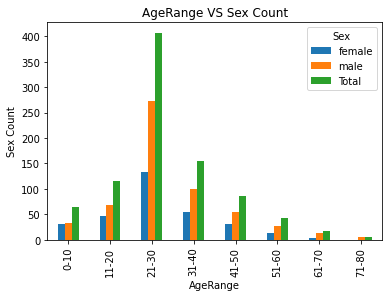

In [20]:
train7=train.copy()
train7['AgeRange']=np.select(conditions, values)
train7 = train7.groupby('AgeRange').agg(count=('Sex', 'value_counts'))
train7 = train7.reset_index()
train7 = train7.pivot(index='AgeRange', columns='Sex', values='count')
train7[train7.isnull()] = 0
train7['Total'] = train7['female'] + train7['male']
plot1 = train7.reset_index().plot(kind='bar', x="AgeRange", y=['female','male','Total'])
plot1.set_xlabel('AgeRange')
plot1.set_ylabel('Sex Count')
plot1.set_title('AgeRange VS Sex Count')
plot1.set_visible(True)
train7

# In all the age categories, number of males are significantly larger than that of females

SibSp,0,1,2,3,4,5,8
AgeRange,,,,,,,
0-10,16.0,19.0,6.0,7.0,14.0,2.0,0.0
11-20,76.0,28.0,3.0,1.0,4.0,3.0,0.0
21-30,309.0,71.0,13.0,7.0,0.0,0.0,7.0
31-40,101.0,51.0,2.0,1.0,0.0,0.0,0.0
41-50,57.0,26.0,3.0,0.0,0.0,0.0,0.0
51-60,30.0,11.0,1.0,0.0,0.0,0.0,0.0
61-70,14.0,3.0,0.0,0.0,0.0,0.0,0.0
71-80,5.0,0.0,0.0,0.0,0.0,0.0,0.0


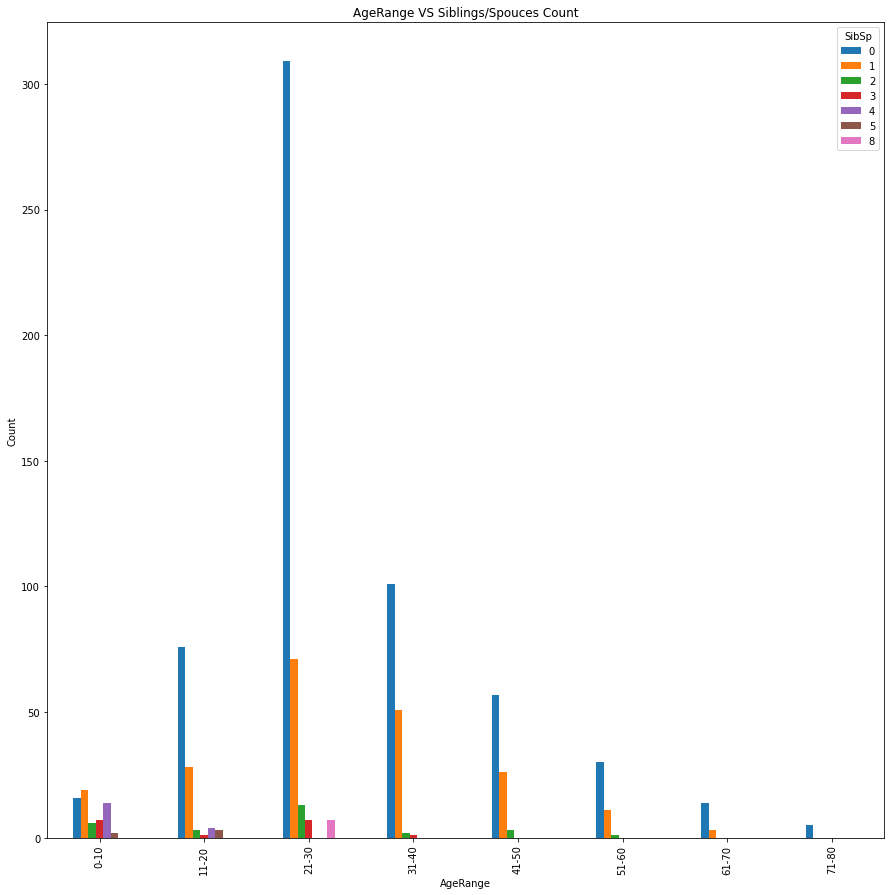

In [21]:
train8=train.copy()
train8['AgeRange']=np.select(conditions, values)
train8 = train8.groupby('AgeRange').agg(count=('SibSp', 'value_counts'))
train8 = train8.reset_index()
train8 = train8.pivot(index='AgeRange', columns='SibSp', values='count')
train8[train8.isnull()] = 0
plot1 = train8.reset_index().plot(figsize=(15,15), kind='bar', x="AgeRange", y=train8.columns)
plot1.set_xlabel('AgeRange')
plot1.set_ylabel('Count')
plot1.set_title('AgeRange VS Siblings/Spouces Count')
plot1.set_visible(True)
train8

# Children at the age of 0-10 are accompanied by the most family members and as the age increases, SibSp = 1 increases till age 31-40 and decreases thereafter

Parch,0,1,2,3,4,5,6
AgeRange,,,,,,,
0-10,1.0,35.0,28.0,0.0,0.0,0.0,0.0
11-20,85.0,16.0,13.0,1.0,0.0,0.0,0.0
21-30,354.0,23.0,27.0,2.0,1.0,0.0,0.0
31-40,121.0,21.0,8.0,0.0,1.0,4.0,0.0
41-50,66.0,13.0,3.0,1.0,1.0,1.0,1.0
51-60,32.0,8.0,1.0,1.0,0.0,0.0,0.0
61-70,14.0,2.0,0.0,0.0,1.0,0.0,0.0
71-80,5.0,0.0,0.0,0.0,0.0,0.0,0.0


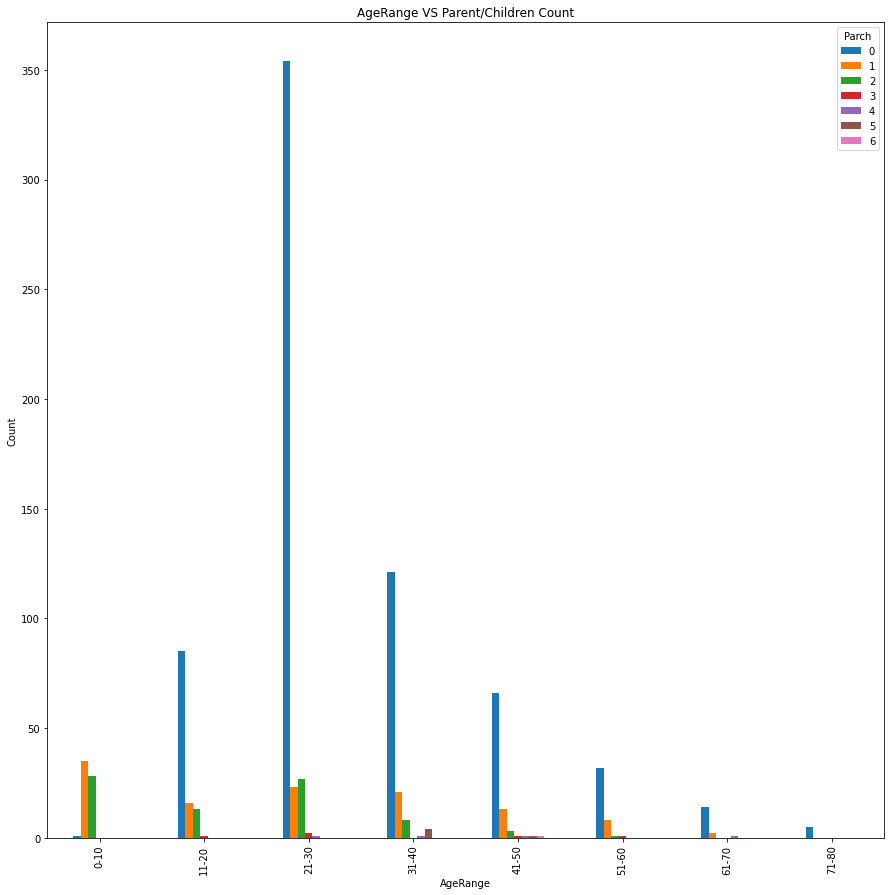

In [22]:
train9=train.copy()
train9['AgeRange']=np.select(conditions, values)
train9 = train9.groupby('AgeRange').agg(count=('Parch', 'value_counts'))
train9 = train9.reset_index()
train9 = train9.pivot(index='AgeRange', columns='Parch', values='count')
train9[train9.isnull()] = 0
plot1 = train9.reset_index().plot(figsize=(15,15), kind='bar', x="AgeRange", y=train9.columns)
plot1.set_xlabel('AgeRange')
plot1.set_ylabel('Count')
plot1.set_title('AgeRange VS Parent/Children Count')
plot1.set_visible(True)
train9

# people at the age of 0-20 are accompanied more by a single parent/single child and as the age increases, this count significantly decreases

Family,0,1,2,3,4,5,6,7,10
AgeRange,,,,,,,,,
0-10,1.0,6.0,23.0,10.0,4.0,11.0,7.0,2.0,0.0
11-20,65.0,25.0,13.0,2.0,2.0,3.0,2.0,3.0,0.0
21-30,290.0,63.0,26.0,11.0,7.0,3.0,0.0,0.0,7.0
31-40,92.0,30.0,23.0,5.0,0.0,2.0,3.0,0.0,0.0
41-50,46.0,25.0,10.0,1.0,1.0,2.0,0.0,1.0,0.0
51-60,25.0,10.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0
61-70,13.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
71-80,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


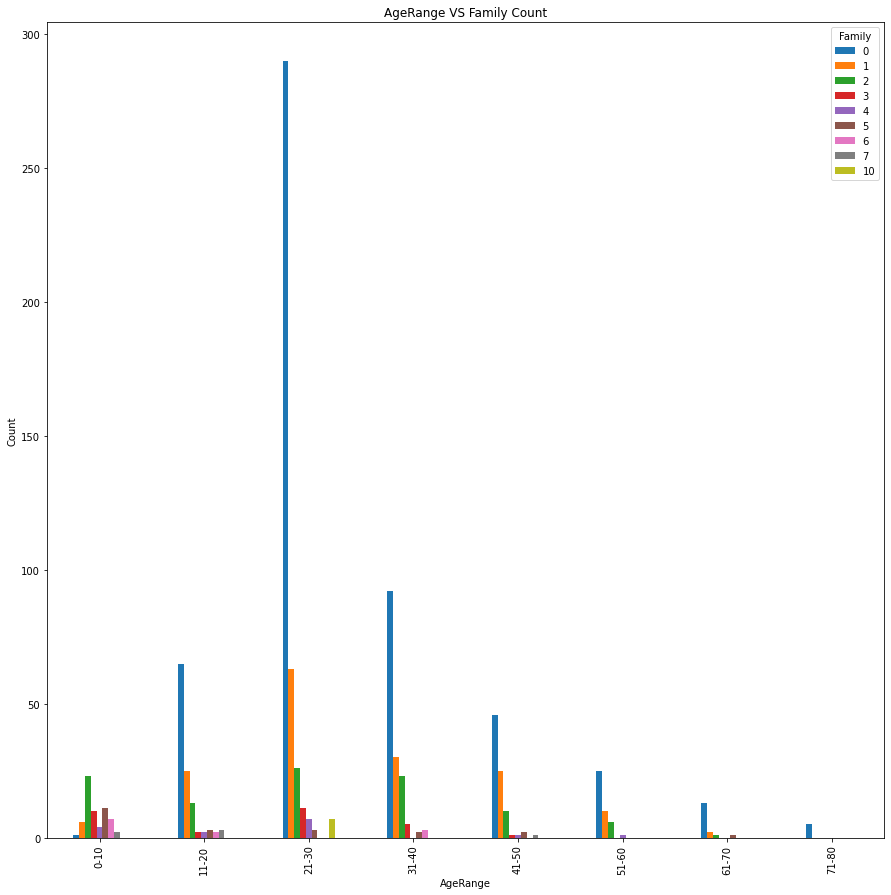

In [23]:
train10=train.copy()
train10['Family']=train10['SibSp'] + train10['Parch']
train10['AgeRange']=np.select(conditions, values)
train10 = train10.groupby('AgeRange').agg(count=('Family', 'value_counts'))
train10 = train10.reset_index()
train10 = train10.pivot(index='AgeRange', columns='Family', values='count')
train10[train10.isnull()] = 0
plot1 = train10.reset_index().plot(figsize=(15,15), kind='bar', x="AgeRange", y=train10.columns)
plot1.set_xlabel('AgeRange')
plot1.set_ylabel('Count')
plot1.set_title('AgeRange VS Family Count')
plot1.set_visible(True)
train10

# Children at the age of 0-10 are mostly accompanied by 2 more people

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


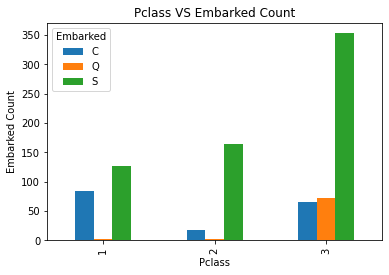

In [24]:
train11 = train.groupby('Pclass').agg(count=('Embarked', 'value_counts'))
train11 = train11.reset_index()
train11 = train11.pivot(index='Pclass', columns='Embarked', values='count')
train11[train11.isnull()] = 0
plot1 = train11.reset_index().plot(kind='bar', x="Pclass", y=train11.columns)
plot1.set_xlabel('Pclass')
plot1.set_ylabel('Embarked Count')
plot1.set_title('Pclass VS Embarked Count')
plot1.set_visible(True)
train11

# More people have boarded the Titanic from Port Southampton 'S'
# People who boarded in Cherbourg 'C' have mostly 1st class tickets than the other classes

<font color='green'>Assumptions:</font>

<font color='green'>1. We assume that the data provided have correct details and can be trusted for modeling.</font>

<font color='green'>2. We assume that PassengerId and Name do not have any role in survival.</font>

<font color='green'>3. We assume that Cabin could have had a role in survival but we don't use it in our model because it has a lot of empty values.</font>

### 2.3.5 Sampling method
We think that the sampling method used was "Simple Random Sampling" because only 1309 records were provided out of 2224 passengers aboard the Titanic (Data population).


#**<font color='orange'>Project Stage 2**------------------------------------------------------------------------------------------------------</font>

#**3. Requirements**

## 3.1 Stage-1 Comments

Stage-1 comments are addressed and highlighted in green.

## 3.2 Data Transformation and EDA

### 3.2.1 Data Transformation


*   Column Cabin has empty values for 687 out of 891 rows. So we are removing this column since we cannot do any analysis with the available data in this column.
*   Column Embarked has empty values for 2 rows. Missing values in Column Embarked is updated with largest occurence of the value in that column which is 'S'
*   Column Pclass datatype is changed to string from int because we want the ML model to see this data as categorical ordinal data and not as quantitative data.
*   Column Age has empty values for 177 rows. 
      
       -> We categorized the entire data that has non-empty value for "Age" column into 6 different sub-categories for males and females separately. Mean age was calculated for each of the sub-categories. We updated the missing value for Age column for a person in a particular sub-category with the mean age of that sub-category.
       
       -> Female: Based on the name prefix, "Mrs." and "Miss", we divided females into 2 categories as Married and Un-married/Widowed respectively. Under Married category, we furthur divide them into 3 sub-categories namely, accompanied by spouces/Siblings, accompanied by children, accompanied by none. Under Un-married/Widowed category, we furthur divide into 3 sub-categories namely, female children who were accompanied by parents and siblings, females who were accompanied by only Siblings, females who were accompanied by none.

       -> Male: Based on the name prefix, "Mr." and "Master.", we divided males into 2 categories as Adult (considered  during that time) and child respectively. Under Adult category, we furthur divide them into 3 sub-categories namely, accompanied by spouces/Siblings, accompanied by children, accompanied by none. Under Child category, we furthur divide into 3 sub-categories namely, male children who were accompanied by parents and siblings, male children who were accompanied by only siblings, male children who were accompanied by none. 

       Mean age for male children who were accompanied by none is empty. 

In [25]:
train = trainData.copy()

In [26]:
#Removing Cabin column since 687 out of 891 rows is empty for that column.
train = train.drop(columns=['Cabin'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
#Updating missing values in column Embarked with largest occurence of the value in the column
max_embarked = train.groupby('Embarked')['PassengerId'].nunique().reset_index().max()['Embarked']
idx = train[train['Embarked'].isnull()].index
train.loc[idx, ['Embarked']] = max_embarked

In [28]:
#Updating datatype of Pclass to string
train["Pclass"] = train["Pclass"].apply(str)

In [29]:
af_married_nochild = train[(train['Sex']=='female') & (train['Age'].isnull()==False)  & (train['Name'].str.contains('Mrs.', case=False)) & (train['SibSp'] != 0) & (train['Parch'] == 0)]['Age'].mean()
print("Mean age for female who is married and accompanied by only spouces/siblings is %f" %(af_married_nochild))
af_married_children = train[(train['Sex']=='female') & (train['Age'].isnull()==False)  & (train['Name'].str.contains('Mrs.', case=False)) & (train['Parch'] != 0)]['Age'].mean()
print("Mean age for female who is married and accompanied with parents/children is %f" %(af_married_children))
af_married_alone = train[(train['Sex']=='female') & (train['Age'].isnull()==False)  & (train['Name'].str.contains('Mrs.', case=False)) & (train['SibSp'] == 0) & (train['Parch'] == 0)]['Age'].mean()
print("Mean age for female who is married but accompanied by none is %f" %(af_married_alone))

af_miss_parents_siblings = train[(train['Sex']=='female') & (train['Age'].isnull()==False)  & (train['Name'].str.contains('Miss.', case=False)) & (train['Parch'] != 0)]['Age'].mean()
print("Mean age for female who is accompanied by parents (and siblings) is %f" %(af_miss_parents_siblings))
af_miss_siblings = train[(train['Sex']=='female') & (train['Age'].isnull()==False)  & (train['Name'].str.contains('Miss.', case=False)) & (train['SibSp'] != 0) & (train['Parch'] == 0)]['Age'].mean()
print("Mean age for female who is accompanied by only siblings is %f" %(af_miss_siblings))
af_miss_alone = train[(train['Sex']=='female') & (train['Age'].isnull()==False)  & (train['Name'].str.contains('Miss.', case=False)) & (train['SibSp'] == 0) & (train['Parch'] == 0)]['Age'].mean()
print("Mean age for female who is accompanied by none is %f" %(af_miss_alone))

Mean age for female who is married and accompanied by only spouces/siblings is 33.250000
Mean age for female who is married and accompanied with parents/children is 36.339623
Mean age for female who is married but accompanied by none is 38.736842
Mean age for female who is accompanied by parents (and siblings) is 11.863636
Mean age for female who is accompanied by only siblings is 27.884615
Mean age for female who is accompanied by none is 27.743590


In [30]:
am_mr_sibsp = train[(train['Sex']=='male') & (train['Age'].isnull()==False)  & (train['Name'].str.contains('Mr.', case=False)) & (train['SibSp'] != 0) & (train['Parch'] == 0)]['Age'].mean()
print("Mean age for male who is accompanied by Spouces or Siblings is %f" %(am_mr_sibsp))
am_mr_parch_sibsp = train[(train['Sex']=='male') & (train['Age'].isnull()==False)  & (train['Name'].str.contains('Mr.', case=False)) & (train['Parch'] != 0)]['Age'].mean()
print("Mean age for male who is accompanied by Parents or children is %f" %(am_mr_parch_sibsp))
am_mr_alone =  train[(train['Sex']=='male') & (train['Age'].isnull()==False)  & (train['Name'].str.contains('Mr.', case=False)) & (train['SibSp'] == 0) & (train['Parch'] == 0)]['Age'].mean()
print("Mean age for male who came alone is %f" %(am_mr_alone))
am_dr = train[(train['Sex']=='male') & (train['Age'].isnull()==False)  & (train['Name'].str.contains('Dr.', case=False))]['Age'].mean()
print("Mean age for male whose name is prefixed with 'Dr.' is %f" %(am_dr))

am_mas_par_sib = train[(train['Sex']=='male') & (train['Age'].isnull()==False)  & (train['Name'].str.contains('Master.', case=False)) & (train['Parch'] != 0)]['Age'].mean()
print("Mean age for male child who are accompanied by parents (and siblings) is %f" %(am_mas_par_sib))
am_mas_sib = train[(train['Sex']=='male') & (train['Age'].isnull()==False)  & (train['Name'].str.contains('Master.', case=False)) & (train['SibSp'] != 0) & (train['Parch'] == 0)]['Age'].mean()
print("Mean age for male child who are accompanied only by siblings is %f" %(am_mas_sib))
am_mas_alone = train[(train['Sex']=='male') & (train['Age'].isnull()==False)  & (train['Name'].str.contains('Master.', case=False)) & (train['SibSp'] == 0) & (train['Parch'] == 0)]['Age'].mean()
print("Mean age for male child who came alone is %f" %(am_mas_alone))


Mean age for male who is accompanied by Spouces or Siblings is 31.591667
Mean age for male who is accompanied by Parents or children is 33.562500
Mean age for male who came alone is 32.388316
Mean age for male whose name is prefixed with 'Dr.' is 31.588235
Mean age for male child who are accompanied by parents (and siblings) is 4.362000
Mean age for male child who are accompanied only by siblings is 12.000000
Mean age for male child who came alone is nan


In [31]:
#Filling up mean age in empty values for females based on the categories they fall into:

idx = train[(train['Sex']=='female') & (train['Age'].isnull())  & (train['Name'].str.contains('Mrs.', case=False)) & (train['SibSp'] != 0) & (train['Parch'] == 0)].index
train.loc[idx, ['Age']] = af_married_nochild

idx = train[(train['Sex']=='female') & (train['Age'].isnull())  & (train['Name'].str.contains('Mrs.', case=False)) & (train['Parch'] != 0)].index
train.loc[idx, ['Age']] = af_married_children

idx = train[(train['Sex']=='female') & (train['Age'].isnull())  & (train['Name'].str.contains('Mrs.', case=False)) & (train['SibSp'] == 0) & (train['Parch'] == 0)].index
train.loc[idx, ['Age']] = af_married_alone

idx = train[(train['Sex']=='female') & (train['Age'].isnull())  & (train['Name'].str.contains('Miss.', case=False)) & (train['Parch'] != 0)].index
train.loc[idx, ['Age']] = af_miss_parents_siblings

idx = train[(train['Sex']=='female') & (train['Age'].isnull())  & (train['Name'].str.contains('Miss.', case=False)) & (train['SibSp'] != 0) & (train['Parch'] == 0)].index
train.loc[idx, ['Age']] = af_miss_siblings

idx = train[(train['Sex']=='female') & (train['Age'].isnull())  & (train['Name'].str.contains('Miss.', case=False)) & (train['SibSp'] == 0) & (train['Parch'] == 0)].index
train.loc[idx, ['Age']] = af_miss_alone

In [32]:
#Filling up mean age in empty values for males based on the categories they fall into:

idx = train[(train['Sex']=='male') & (train['Age'].isnull())  & (train['Name'].str.contains('Mr.', case=False)) & (train['SibSp'] != 0) & (train['Parch'] == 0)].index
train.loc[idx, ['Age']] = am_mr_sibsp

idx = train[(train['Sex']=='male') & (train['Age'].isnull())  & (train['Name'].str.contains('Mr.', case=False)) & (train['Parch'] != 0)].index
train.loc[idx, ['Age']] = am_mr_parch_sibsp

idx =  train[(train['Sex']=='male') & (train['Age'].isnull())  & (train['Name'].str.contains('Mr.', case=False)) & (train['SibSp'] == 0) & (train['Parch'] == 0)].index
train.loc[idx, ['Age']] = am_mr_alone

idx =  train[(train['Sex']=='male') & (train['Age'].isnull())  & (train['Name'].str.contains('Dr.', case=False))].index
train.loc[idx, ['Age']] = am_dr

idx = train[(train['Sex']=='male') & (train['Age'].isnull())  & (train['Name'].str.contains('Master.', case=False)) & (train['Parch'] != 0)].index
train.loc[idx, ['Age']] = am_mas_par_sib

idx = train[(train['Sex']=='male') & (train['Age'].isnull())  & (train['Name'].str.contains('Master.', case=False)) & (train['SibSp'] != 0) & (train['Parch'] == 0)].index
train.loc[idx, ['Age']] = am_mas_sib

In [33]:
# Females who didn't have "Miss." or "Mrs." prefix in their names
train[(train['Sex']=='female') & (train['Age'].isnull()==False)  & (train['Name'].str.contains('Mrs.', case=False) == False) & (train['Name'].str.contains('Miss.', case=False) == False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,C
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,C
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,S
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,S


In [34]:
# Males who didn't have "Mr." and "Master." prefix in their names instead had "Dr.", "Rev.", "Major", "Col", "Capt" 
# which means they are Doctors, Reverends, Major, Colonel, Captain respectively.

train[(train['Sex']=='male') & (train['Age'].isnull()==False)  & (train['Name'].str.contains('Mr.', case=False) == False) & (train['Name'].str.contains('Master.', case=False) == False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.000000,0,0,PC 17601,27.7208,C
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.000000,0,0,244310,13.0000,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.000000,0,0,S.O.P. 1166,12.5250,S
245,246,0,1,"Minahan, Dr. William Edward",male,44.000000,2,0,19928,90.0000,Q
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.000000,1,0,244252,26.0000,S
317,318,0,2,"Moraweck, Dr. Ernest",male,54.000000,0,0,29011,14.0000,S
398,399,0,2,"Pain, Dr. Alfred",male,23.000000,0,0,244278,10.5000,S
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.000000,0,0,113786,30.5000,S
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.000000,0,0,113050,26.5500,S
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.000000,0,0,219533,12.3500,Q


In [35]:
# The least age when a female is married is 14
train[(train['Age']<=14) & (train['Name'].str.contains('Mrs.', case=False))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [36]:
# Prefix "Miss" in the name of females is found across all ages
train[(train['Age'].isnull()==False) & (train['Name'].str.contains('Miss.', case=False))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000000,0,0,350406,7.8542,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.000000,0,0,330923,8.0292,Q
...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.000000,1,0,SC/PARIS 2149,13.8583,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.000000,0,0,2667,7.2250,C
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S


In [37]:
# Least age when a male is addressed as "Mr." in the name
train[(train['Age']<=11) & (train['Name'].str.contains('Mr.', case=False))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,C


### 3.2.2 EDA and Feature Selection

Features selected for modeling: Pclass, Age, Sex, SipSp, Parch, Fare, Embarked

Age: EDA shows that individuals that fall under 0-10 age range proportionately survived more than the other categories. Also, we believe that age is one of the factor that would have played a major role in survival (negatively correlated with survival). Adults might have higher endurance, strength and survival instincts than other age categories.

Pclass: EDA shows that passengers in 1st class proportionately survived more than the passengers in other classes. So we believe that socio-economic status also had a role in survival (negatively correlated with survival which means, as Pclass increased from 1 to 3, survival decreased)

Sex: EDA shows that females proportionately survived more than males. We believe that females were prioritized while saving. So Sex plays a major role in survival.

SibSp: EDA shows that passengers with 1 SibSp count proportionately survived more than others. An insight drawn here is children with 1 siblings at the age of 0-10 (insight from Age) proportionately survived more than others.

Parch: EDA shows that passengers with 1 and 2 Parch count proportionately survived more than others. An insight drawn from here is females (insight from Sex) with upto 2 children proportionately survived more than others.

Fare: This feature is quantitative and also attributes to the socio-economic status of the passengers. Fares are scattered and ranged between 0 - 512.32 (min - max). 75% of the passengers paid less than 31 as the fare.

Embarked: This feature tells about the region where passengers boarded the Titanic. This could say more about regional characteristics and so we keep this data to differentiate people based on regions and classify. EDA also shows that passengers who boarded in Cherbourg proportionately survived more than others. Also passengers who boarded in Cherbourg have mostly 1st class tickets than the other classes.


*Correlation with Survived:*

PassengerId   -0.005007

Pclass        -0.338481

Age           -0.074680

SibSp         -0.035322

Parch          0.081629

Fare           0.257307

Family         0.016639

Survived,0,1,Total
AgeRange,,,
0-10,26,38,64
11-20,71,44,115
21-30,271,136,407
31-40,86,69,155
41-50,53,33,86
51-60,25,17,42
61-70,13,4,17
71-80,4,1,5


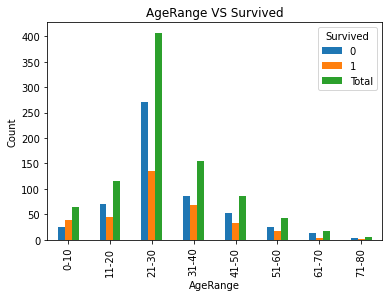

In [38]:
train3=train.copy()
train3['AgeRange']=np.select(conditions, values)
train3 = train3.groupby('AgeRange').agg(count=('Survived', 'value_counts'))
train3 = train3.reset_index()
train3 = train3.pivot(index='AgeRange', columns='Survived', values='count')
train3[train3.isnull()] = 0
train3['Total'] = train3[0] + train3[1]
plot1 = train3.reset_index().plot(kind='bar', x="AgeRange", y=[0,1,'Total'])
plot1.set_xlabel('AgeRange')
plot1.set_ylabel('Count')
plot1.set_title('AgeRange VS Survived')
plot1.set_visible(True)
train3

# More than half of the children at the age of 0 to 10 survived.
# For the rest of the age, deaths were greater than survived count.

Survived,0,1,Total
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491


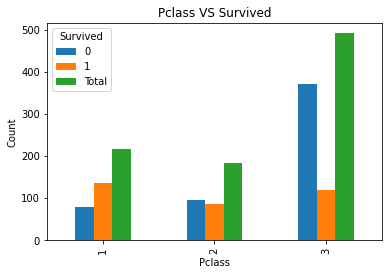

In [39]:
train1 = train.groupby('Pclass').agg(count=('Survived', 'value_counts'))
train1 = train1.reset_index()
train1 = train1.pivot(index='Pclass', columns='Survived', values='count')
train1[train1.isnull()] = 0
train1['Total'] = train1[0] + train1[1]
plot1 = train1.reset_index().plot(kind='bar', x="Pclass", y=[0,1,'Total'])
plot1.set_xlabel('Pclass')
plot1.set_ylabel('Count')
plot1.set_title('Pclass VS Survived')
plot1.set_visible(True)
train1

# Number of people in 1st class (Pclass=1) proportionately survived more than the other classes

Survived,0,1,Total
Sex,,,
female,81,233,314
male,468,109,577


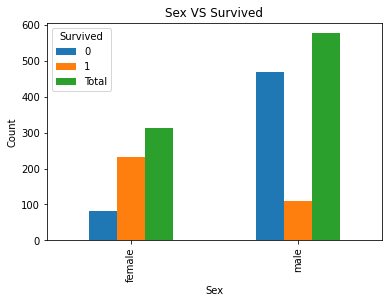

In [40]:
train2 = train.groupby('Sex').agg(count=('Survived', 'value_counts'))
train2 = train2.reset_index()
train2 = train2.pivot(index='Sex', columns='Survived', values='count')
train2[train2.isnull()] = 0
train2['Total'] = train2[0] + train2[1]
plot1 = train2.reset_index().plot(kind='bar', x="Sex", y=[0,1,'Total'])
plot1.set_xlabel('Sex')
plot1.set_ylabel('Count')
plot1.set_title('Sex VS Survived')
plot1.set_visible(True)
train2

# More females survived even though females were proportionately very less compared to males

Survived,0,1,Total
SibSp,,,
0,398.0,210.0,608.0
1,97.0,112.0,209.0
2,15.0,13.0,28.0
3,12.0,4.0,16.0
4,15.0,3.0,18.0
5,5.0,0.0,5.0
8,7.0,0.0,7.0


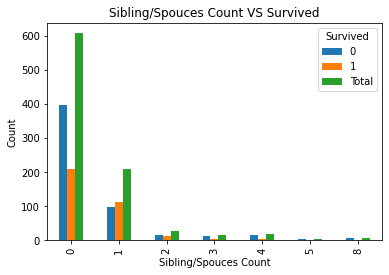

In [41]:
train4 = train.groupby('SibSp').agg(count=('Survived', 'value_counts'))
train4 = train4.reset_index()
train4 = train4.pivot(index='SibSp', columns='Survived', values='count')
train4[train4.isnull()] = 0
train4['Total'] = train4[0] + train4[1]
plot1 = train4.reset_index().plot(kind='bar', x="SibSp", y=[0,1,'Total'])
plot1.set_xlabel('Sibling/Spouces Count')
plot1.set_ylabel('Count')
plot1.set_title('Sibling/Spouces Count VS Survived')
plot1.set_visible(True)
train4

# Number of people who were accompanied by 1 Sibling or Spouce have proportionately survived more than the other categories
# Number of people who came alone overall had survived more than the others who had company

Survived,0,1,Total
Parch,,,
0,445.0,233.0,678.0
1,53.0,65.0,118.0
2,40.0,40.0,80.0
3,2.0,3.0,5.0
4,4.0,0.0,4.0
5,4.0,1.0,5.0
6,1.0,0.0,1.0


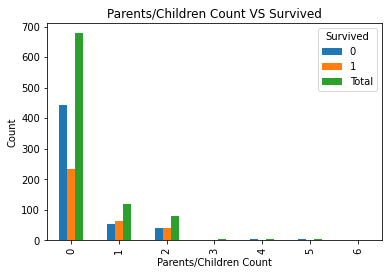

In [42]:
train5 = train.groupby('Parch').agg(count=('Survived', 'value_counts'))
train5 = train5.reset_index()
train5 = train5.pivot(index='Parch', columns='Survived', values='count')
train5[train5.isnull()] = 0
train5['Total'] = train5[0] + train5[1]
plot1 = train5.reset_index().plot(kind='bar', x="Parch", y=[0,1,'Total'])
plot1.set_xlabel('Parents/Children Count')
plot1.set_ylabel('Count')
plot1.set_title('Parents/Children Count VS Survived')
plot1.set_visible(True)
train5

# Number of people who were accompanied by 1 Parent/child have proportionately survived more than the other categories
# Number of people who came alone overall had survived more than the others who had company

In [43]:
print('Minimum fare = %f' %(train['Fare'].min()))
print('Maximum fare = %f' %(train['Fare'].max()))
print('Mean fare = %f' %(train['Fare'].mean()))
fareQuartile = train.Fare.quantile([0.25,0.5,0.75])
print('25%% passengers fare = %f' %(fareQuartile[0.25]))
print('50%% passengers fare = %f' %(fareQuartile[0.50]))
print('75%% passengers fare = %f' %(fareQuartile[0.75]))
print('Mode fare = %f' %(train['Fare'].mode()[0]))

Minimum fare = 0.000000
Maximum fare = 512.329200
Mean fare = 32.204208
25% passengers fare = 7.910400
50% passengers fare = 14.454200
75% passengers fare = 31.000000
Mode fare = 8.050000


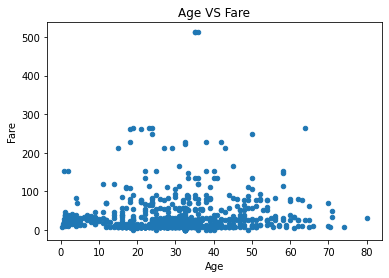

In [44]:
# Relationship between Age and Fare
plot1 = train.plot(kind='scatter', x='Age', y='Fare')
plot1.set_xlabel('Age')
plot1.set_ylabel('Fare')
plot1.set_title('Age VS Fare')
plot1.set_visible(True)

Survived,0,1,Total
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,219,646


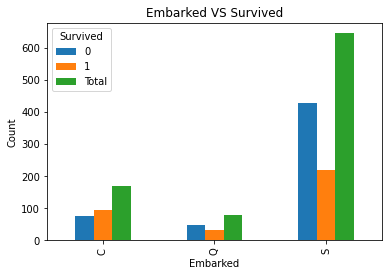

In [45]:
train12 = train.groupby('Embarked').agg(count=('Survived', 'value_counts'))
train12 = train12.reset_index()
train12 = train12.pivot(index='Embarked', columns='Survived', values='count')
train12[train12.isnull()] = 0
train12['Total'] = train12[0] + train12[1]
plot1 = train12.reset_index().plot(kind='bar', x="Embarked", y=[0,1,'Total'])
plot1.set_xlabel('Embarked')
plot1.set_ylabel('Count')
plot1.set_title('Embarked VS Survived')
plot1.set_visible(True)
train12

In [46]:
#Correlation with Survived
train13 = train.copy()
train13['Family']=train13['SibSp'] + train13['Parch']
train13.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Age           -0.074680
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Family         0.016639
Name: Survived, dtype: float64

### 3.2.3 Readiness of the data

*   We are keeping only selected features mentioned in the previous section and removing the rest. 
*   We pop Survived from the train since we are going to predict that feature.
*   We see that Fare has a very wide range compared to other features. But we didn't apply any normalization techniques because our selected machine learning model (Random Forest Classifier) doesn't require normalization.
*   We are encoding the categorical columns namely, Sex, Pclass and Embarked since most of the machine learning models can only understand numerical data and not string values. This results in creating dummy valued columns in train data.


In [47]:
#Keeping only selected features
train = train.drop(columns=['PassengerId', 'Name', 'Ticket'])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [48]:
#train->X, labels->Y
labels = train.pop("Survived")
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [49]:
for col in train.dtypes[train.dtypes == "object"].index:
  for_dummy = train.pop(col)
  train = pd.concat([train,pd.get_dummies(for_dummy, prefix=col)],axis=1)
train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


## 3.3 Modeling

### 3.3.1 Chosen Model: Random Forest Classifier

We chose this model because our problem is of type Classification and this model works for Classification problems and also we got to know that the accuracy from using this model is better.

### 3.3.2 Selected features in model

We have given equal weightage to all the selected features when passing to the model.

<font color='red'>We have split the train data into train and validation based on stratified sampling on the column Survived maintaining the ratio of survived to not-survived as same across train and validation set.</font>

In [50]:
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier

#Splitting into train and test
#x_train,x_test,y_train,y_test = train_test_split(, , test_size=0.20, random_state=42)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train, labels):
 x_train, y_train = train.loc[train_index], labels.loc[train_index]
 x_test, y_test = train.loc[test_index], labels.loc[test_index]

print('Survived ratio in train: %f' %(y_train[y_train == 0].shape[0]/y_train[y_train == 1].shape[0]))
print('Survived ratio in test: %f' %(y_test[y_test == 0].shape[0]/y_test[y_test == 1].shape[0]))

#Initializing RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

Survived ratio in train: 1.608059
Survived ratio in test: 1.594203


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
y_pred = rf.predict(x_test)

In [52]:
from sklearn.metrics import roc_curve , auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
print('Accuracy score: %f' %(roc_auc))

Accuracy score: 0.800527


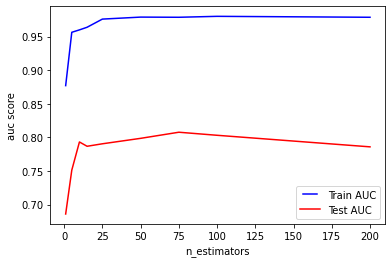

Train results:
[0.8770724340200422, 0.956381886905805, 0.9599531068779361, 0.963862257711916, 0.9759902208649361, 0.9789606748604471, 0.9787145276894708, 0.9800996270244562, 0.9787145276894708]
Test results:
[0.6861660079051384, 0.7513833992094863, 0.7932806324110672, 0.7868906455862978, 0.7905797101449274, 0.7986824769433466, 0.8077733860342556, 0.8032279314888011, 0.7860342555994729]


In [53]:
n_estimators=[1,5,10,15,25,50,75,100,200]
train_results = []
test_results = []

for estimator in n_estimators:
  rf = RandomForestClassifier(n_estimators=estimator,n_jobs= -1)
  rf.fit(x_train,y_train)
  train_pred = rf.predict(x_train)
  false_positive_rate,true_positive_rate,thresholds = roc_curve(y_train,train_pred)
  roc_auc = auc(false_positive_rate,true_positive_rate)
  train_results.append(roc_auc)
  y_pred = rf.predict(x_test)
  false_positive_rate,true_positive_rate,thresholds= roc_curve(y_test,y_pred)
  roc_auc=auc(false_positive_rate,true_positive_rate)
  test_results.append(roc_auc)

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators,train_results , "b", label ="Train AUC")
line2, = plt.plot(n_estimators,test_results , "r", label ="Test AUC")
plt.legend(handler_map = {line1: HandlerLine2D(numpoints=2)})

plt.ylabel("auc score")
plt.xlabel("n_estimators")

plt.show()
print("Train results:")
print(train_results)
print("Test results:")
print(test_results)

At n_estimator = 50, I see both train and test are at its peak. 
So I'm choosing n_estimators as 50


Now the model is ready, we need to ready the test data by applying all transformations.

In [54]:
trow, tcol = test.shape
print("Total rows in test data: %d" %(trow))
print("*****************************************************")
for column_name in test.columns.values:
  row, col = test[test[column_name].isna()].shape
  print("Number of empty values in Column: %s = %d" %(column_name, row))
print("*****************************************************")
row, col = test[test.isna().any(axis=1)].shape
print("Number of rows with 1 or more empty values for columns = %d" %(row))

Total rows in test data: 418
*****************************************************
Number of empty values in Column: PassengerId = 0
Number of empty values in Column: Pclass = 0
Number of empty values in Column: Name = 0
Number of empty values in Column: Sex = 0
Number of empty values in Column: Age = 86
Number of empty values in Column: SibSp = 0
Number of empty values in Column: Parch = 0
Number of empty values in Column: Ticket = 0
Number of empty values in Column: Fare = 1
Number of empty values in Column: Cabin = 327
Number of empty values in Column: Embarked = 0
*****************************************************
Number of rows with 1 or more empty values for columns = 331


In [55]:
testData = test.copy()

We updated the missing values in Fare to the mean value of the column.

In [56]:
#Updating missing value in column Fare with the mean value of the column
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

We need to remove the Cabin feature since it has 327 missing values and also we did remove this feature in training data as well.

In [57]:
test = test.drop(columns=['Cabin'])
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


We need to change the datatype to String for Pclass

In [58]:
#Updating datatype of Pclass to string
test["Pclass"] = test["Pclass"].apply(str)

We need to update Age by following similar rules as that of train data

In [59]:
af_married_nochild1 = test[(test['Sex']=='female') & (test['Age'].isnull()==False)  & (test['Name'].str.contains('Mrs.', case=False)) & (test['SibSp'] != 0) & (test['Parch'] == 0)]['Age'].mean()
print("Mean age for female who is married and accompanied by only spouces/siblings is %f" %(af_married_nochild1))
af_married_children1 = test[(test['Sex']=='female') & (test['Age'].isnull()==False)  & (test['Name'].str.contains('Mrs.', case=False)) & (test['Parch'] != 0)]['Age'].mean()
print("Mean age for female who is married and accompanied with parents/children is %f" %(af_married_children1))
af_married_alone1 = test[(test['Sex']=='female') & (test['Age'].isnull()==False)  & (test['Name'].str.contains('Mrs.', case=False)) & (test['SibSp'] == 0) & (test['Parch'] == 0)]['Age'].mean()
print("Mean age for female who is married but accompanied by none is %f" %(af_married_alone1))

af_miss_parents_siblings1 = test[(test['Sex']=='female') & (test['Age'].isnull()==False)  & (test['Name'].str.contains('Miss.', case=False)) & (test['Parch'] != 0)]['Age'].mean()
print("Mean age for female who is accompanied by parents (and siblings) is %f" %(af_miss_parents_siblings1))
af_miss_siblings1 = test[(test['Sex']=='female') & (test['Age'].isnull()==False)  & (test['Name'].str.contains('Miss.', case=False)) & (test['SibSp'] != 0) & (test['Parch'] == 0)]['Age'].mean()
print("Mean age for female who is accompanied by only siblings is %f" %(af_miss_siblings1))
af_miss_alone1 = test[(test['Sex']=='female') & (test['Age'].isnull()==False)  & (test['Name'].str.contains('Miss.', case=False)) & (test['SibSp'] == 0) & (test['Parch'] == 0)]['Age'].mean()
print("Mean age for female who is accompanied by none is %f" %(af_miss_alone1))

Mean age for female who is married and accompanied by only spouces/siblings is 38.458333
Mean age for female who is married and accompanied with parents/children is 39.259259
Mean age for female who is married but accompanied by none is 39.000000
Mean age for female who is accompanied by parents (and siblings) is 13.004286
Mean age for female who is accompanied by only siblings is 24.750000
Mean age for female who is accompanied by none is 26.192308


In [60]:
am_mr_sibsp1 = test[(test['Sex']=='male') & (test['Age'].isnull()==False)  & (test['Name'].str.contains('Mr.', case=False)) & (test['SibSp'] != 0) & (test['Parch'] == 0)]['Age'].mean()
print("Mean age for male who is accompanied by Spouces or Siblings is %f" %(am_mr_sibsp1))
am_mr_parch_sibsp1 = test[(test['Sex']=='male') & (test['Age'].isnull()==False)  & (test['Name'].str.contains('Mr.', case=False)) & (test['Parch'] != 0)]['Age'].mean()
print("Mean age for male who is accompanied by Parents or children is %f" %(am_mr_parch_sibsp1))
am_mr_alone1 =  test[(test['Sex']=='male') & (test['Age'].isnull()==False)  & (test['Name'].str.contains('Mr.', case=False)) & (test['SibSp'] == 0) & (test['Parch'] == 0)]['Age'].mean()
print("Mean age for male who came alone is %f" %(am_mr_alone1))
am_dr1 = test[(test['Sex']=='male') & (test['Age'].isnull()==False)  & (test['Name'].str.contains('Dr.', case=False))]['Age'].mean()
print("Mean age for male whose name is prefixed with 'Dr.' is %f" %(am_dr1))

am_mas_par_sib1 = test[(test['Sex']=='male') & (test['Age'].isnull()==False)  & (test['Name'].str.contains('Master.', case=False)) & (test['Parch'] != 0)]['Age'].mean()
print("Mean age for male child who are accompanied by parents (and siblings) is %f" %(am_mas_par_sib1))
am_mas_sib1 = test[(test['Sex']=='male') & (test['Age'].isnull()==False)  & (test['Name'].str.contains('Master.', case=False)) & (test['SibSp'] != 0) & (test['Parch'] == 0)]['Age'].mean()
print("Mean age for male child who are accompanied only by siblings is %f" %(am_mas_sib1))
am_mas_alone1 = test[(test['Sex']=='male') & (test['Age'].isnull()==False)  & (test['Name'].str.contains('Master.', case=False)) & (test['SibSp'] == 0) & (test['Parch'] == 0)]['Age'].mean()
print("Mean age for male child who came alone is %f" %(am_mas_alone1))

Mean age for male who is accompanied by Spouces or Siblings is 35.734375
Mean age for male who is accompanied by Parents or children is 40.055556
Mean age for male who came alone is 30.011278
Mean age for male whose name is prefixed with 'Dr.' is 27.062500
Mean age for male child who are accompanied by parents (and siblings) is 7.406471
Mean age for male child who are accompanied only by siblings is nan
Mean age for male child who came alone is nan


In [61]:
#Filling up mean age in empty values for females based on the categories they fall into:

idx = test[(test['Sex']=='female') & (test['Age'].isnull())  & (test['Name'].str.contains('Mrs.', case=False)) & (test['SibSp'] != 0) & (test['Parch'] == 0)].index
test.loc[idx, ['Age']] = af_married_nochild1

idx = test[(test['Sex']=='female') & (test['Age'].isnull())  & (test['Name'].str.contains('Mrs.', case=False)) & (test['Parch'] != 0)].index
test.loc[idx, ['Age']] = af_married_children1

idx = test[(test['Sex']=='female') & (test['Age'].isnull())  & (test['Name'].str.contains('Mrs.', case=False)) & (test['SibSp'] == 0) & (test['Parch'] == 0)].index
test.loc[idx, ['Age']] = af_married_alone1

idx = test[(test['Sex']=='female') & (test['Age'].isnull())  & (test['Name'].str.contains('Miss.', case=False)) & (test['Parch'] != 0)].index
test.loc[idx, ['Age']] = af_miss_parents_siblings1

idx = test[(test['Sex']=='female') & (test['Age'].isnull())  & (test['Name'].str.contains('Miss.', case=False)) & (test['SibSp'] != 0) & (test['Parch'] == 0)].index
test.loc[idx, ['Age']] = af_miss_siblings1

idx = test[(test['Sex']=='female') & (test['Age'].isnull())  & (test['Name'].str.contains('Miss.', case=False)) & (test['SibSp'] == 0) & (test['Parch'] == 0)].index
test.loc[idx, ['Age']] = af_miss_alone1

In [62]:
#Filling up mean age in empty values for males based on the categories they fall into:

idx = test[(test['Sex']=='male') & (test['Age'].isnull())  & (test['Name'].str.contains('Mr.', case=False)) & (test['SibSp'] != 0) & (test['Parch'] == 0)].index
test.loc[idx, ['Age']] = am_mr_sibsp1

idx = test[(test['Sex']=='male') & (test['Age'].isnull())  & (test['Name'].str.contains('Mr.', case=False)) & (test['Parch'] != 0)].index
test.loc[idx, ['Age']] = am_mr_parch_sibsp1

idx =  test[(test['Sex']=='male') & (test['Age'].isnull())  & (test['Name'].str.contains('Mr.', case=False)) & (test['SibSp'] == 0) & (test['Parch'] == 0)].index
test.loc[idx, ['Age']] = am_mr_alone1

idx =  test[(test['Sex']=='male') & (test['Age'].isnull())  & (test['Name'].str.contains('Dr.', case=False))].index
test.loc[idx, ['Age']] = am_dr1

idx = test[(test['Sex']=='male') & (test['Age'].isnull())  & (test['Name'].str.contains('Master.', case=False)) & (test['Parch'] != 0)].index
test.loc[idx, ['Age']] = am_mas_par_sib1

idx = test[(test['Sex']=='male') & (test['Age'].isnull())  & (test['Name'].str.contains('Master.', case=False)) & (test['SibSp'] != 0) & (test['Parch'] == 0)].index
test.loc[idx, ['Age']] = am_mas_sib1

In [63]:
test['Age'] = test['Age'].fillna(test['Age'].mean())

Now that we have imputed missing values, we proceed to ready the test data.

*   We are dropping PassengerId, Name and Ticket columns since we didn't use these columns to train the model.
*   We are encoding Sex, Pclass and Embarked columns since they have categorical values.

In [64]:
test = test.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [65]:
for col in test.dtypes[test.dtypes == "object"].index:
  for_dummy = test.pop(col)
  test = pd.concat([test,pd.get_dummies(for_dummy, prefix=col)],axis=1)
test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


In [66]:
#Training the model with train data and with n_estimator = 50
rf2 = RandomForestClassifier(n_estimators=50, n_jobs= -1)
rf2.fit(train,labels)

#predicting for test data
y_predict = rf2.predict(test)
submission = pd.DataFrame()
submission['PassengerId']=testData['PassengerId']
submission['Survived'] = y_predict
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [67]:
#convert submission to excel
submission.to_csv(index=False)

'PassengerId,Survived\n892,0\n893,0\n894,0\n895,1\n896,0\n897,0\n898,0\n899,0\n900,1\n901,0\n902,0\n903,0\n904,1\n905,0\n906,1\n907,1\n908,0\n909,1\n910,0\n911,1\n912,1\n913,1\n914,1\n915,1\n916,1\n917,0\n918,1\n919,1\n920,1\n921,0\n922,0\n923,0\n924,1\n925,0\n926,1\n927,1\n928,1\n929,0\n930,0\n931,1\n932,0\n933,1\n934,0\n935,1\n936,1\n937,0\n938,1\n939,0\n940,1\n941,1\n942,1\n943,0\n944,1\n945,1\n946,0\n947,0\n948,0\n949,0\n950,0\n951,1\n952,0\n953,0\n954,0\n955,1\n956,1\n957,1\n958,1\n959,0\n960,0\n961,1\n962,1\n963,0\n964,0\n965,0\n966,1\n967,0\n968,0\n969,1\n970,0\n971,1\n972,1\n973,0\n974,0\n975,0\n976,0\n977,0\n978,1\n979,0\n980,0\n981,1\n982,0\n983,0\n984,1\n985,0\n986,0\n987,0\n988,1\n989,0\n990,0\n991,0\n992,1\n993,0\n994,0\n995,0\n996,1\n997,0\n998,0\n999,0\n1000,0\n1001,0\n1002,0\n1003,1\n1004,1\n1005,0\n1006,1\n1007,0\n1008,0\n1009,1\n1010,0\n1011,1\n1012,1\n1013,0\n1014,1\n1015,0\n1016,0\n1017,1\n1018,0\n1019,1\n1020,0\n1021,0\n1022,1\n1023,0\n1024,0\n1025,0\n1026,0\n1027,

### 3.3.3 Loss Function

RandomForestClassifier by default uses Gini impurity as the index for a split.

Gini index is the impurity that a node has and a split is made on a particular attribute when the maximum impurity is reduced by the split. Gini impurity is 0 when a node is pure/homegenous.


### 3.3.4 Model parameters Estimation

Following are the model parameters that are used by the Random Forest Classifier to make a split on a node:
1. max_depth: If we pass a number n to this parameter, then the tree grows until the max_depth and stops.
2. min_samples_split: If n is passed here, then a split will be done on a node only if it has a minimum of n samples in that node.
3. min_samples_leaf: n passed here denotes that, for a node to be considered as leaf, it should have a minimum of n samples in the node.
4. max_leaf_nodes: If n is passed here, the a leaf node can have a maximum of n samples.
5. min_impurity_decrease: A split will be carried on a node, if the impurity decrease from the split is greater than this value.

In [68]:
rf2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3.3.5 Submission to Kaggle

Screenshot of submission to Kaggle:

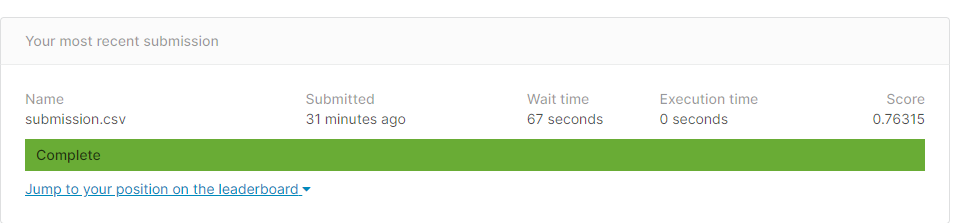


Screenshot of Leaderboard position:

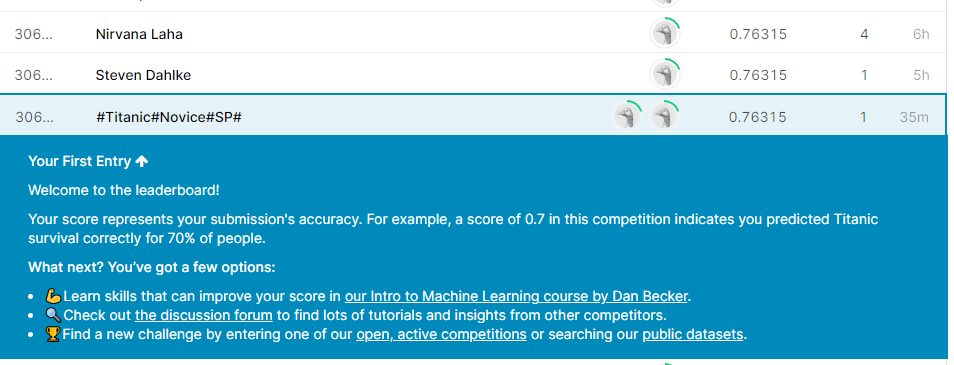

#**<font color='orange'>Project Stage 3**------------------------------------------------------------------------------------------------------</font>

#**4. Requirements**

## 4.1 Project Stage 2 comments

Stage-2 comments are addressed and highlighted in red.

## 4.2 Inference

### 4.2.1 Standard Evaluation Metrics: 

We have chosen accuracy_score from sklearn.metrics package as our evaluation metrics since our problem falls under classification


### 4.2.2 Train Validation Split

We have split the train data into training and validation using KFold so as to eliminate the chance event and compare the accuracies between two models.

Model A: Random Forest Classifier

Model B: Support Vector Classifier

In [69]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def compute_CV_accuracy(modelA, modelB, X_train, Y_train):
    skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    validation_accuracies_A = []
    validation_accuracies_B = []
    
    for train_idx, valid_idx in skf.split(X_train, Y_train):
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

        # Fit the modelA on the training split
        modelA.fit(split_X_train, split_Y_train)
        
        # Compute the prediction accuracy on the validation split
        y_pred_A = modelA.predict(split_X_valid)
        accuracyA = accuracy_score(y_pred_A, split_Y_valid)

        validation_accuracies_A.append(accuracyA)

        # Fit the modelB on the training split
        modelB.fit(split_X_train, split_Y_train)
        
        # Compute the prediction accuracy on the validation split
        y_pred_B = modelB.predict(split_X_valid)
        accuracyB = accuracy_score(y_pred_B, split_Y_valid)

        validation_accuracies_B.append(accuracyB)
        
    return validation_accuracies_A, np.mean(validation_accuracies_A), validation_accuracies_B, np.mean(validation_accuracies_B)


rf3 = RandomForestClassifier(n_estimators=50, n_jobs= -1)
svc = SVC(gamma='auto')

val_accuracy_A, mean_accuracy_A, val_accuracy_B, mean_accuracy_B = compute_CV_accuracy(rf3, svc, train, labels)
print('modelA (Random Forest Classifier) accuracies:')
print(val_accuracy_A)
print('modelB (Support Vector Classifier) accuracies:')
print(val_accuracy_B)
print('Average accuracy of modelA (Random Forest Classifier) : %f' %(mean_accuracy_A))
print('Average accuracy of modelB (Support Vector Classifier) : %f' %(mean_accuracy_B))

modelA (Random Forest Classifier) accuracies:
[0.7877094972067039, 0.797752808988764, 0.8764044943820225, 0.7696629213483146, 0.8539325842696629]
modelB (Support Vector Classifier) accuracies:
[0.6368715083798883, 0.7078651685393258, 0.7134831460674157, 0.7528089887640449, 0.7696629213483146]
Average accuracy of modelA (Random Forest Classifier) : 0.817092
Average accuracy of modelB (Support Vector Classifier) : 0.716138


### 4.2.3 Model A, B comparison for performance

Mean accuracy of Model A is greater than mean accuracy of Model B

Hypothesis testing: To compare two models A and B, we need to do hypothesis testing to reject or accept Null hypothesis which is defined as

Null hypothesis (H_0) : Average accuracy of modelA = average accuracy of modelB

Alternate hypothesis (H_1) : Average accuracy of modelA is greater than average accuracy of modelB

This is a one-tail t-test

In [70]:
from scipy.stats import ttest_ind

t_value, p_value = ttest_ind(val_accuracy_A, val_accuracy_B)
print('t-value : %f' %(t_value))
print('p-value : %f' %(p_value))

t-value : 3.281400
p-value : 0.011164



t-value: 3.2814

p-value: 0.0112

p-value is the area under a normal distribution curve to the left of t-value in x-axis (left-tail test) or right of t-value in x-axis (right-tail test).

Since p-value is less than 0.05, then we can say with 95% confidence that modelA performs better than modelB.

### 4.2.4 Accuracy Improvement

We trained the Random Forest Classifier with the 3rd fold in KFold split since it gave the highest accuracy while testing with validation dataset (0.8764).

In [71]:
rf4 = RandomForestClassifier(n_estimators=50, n_jobs= -1)

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
i = 0
for train_idx, valid_idx in skf.split(train, labels):
  i = i+1
  # split the data
  if i == 3:
    split_X_train, split_X_valid = train.iloc[train_idx], train.iloc[valid_idx]
    split_Y_train, split_Y_valid = labels.iloc[train_idx], labels.iloc[valid_idx]

    # Fit the rf4 on the training split
    rf4.fit(split_X_train, split_Y_train)
  
    # Compute the prediction accuracy on the validation split
    y_pred_A = rf4.predict(split_X_valid)
    accuracyA = accuracy_score(y_pred_A, split_Y_valid)
    print(accuracyA)
  elif i < 3:
    continue
  else:
    break

#predicting for test data
y_predict = rf4.predict(test)
submission = pd.DataFrame()
submission['PassengerId']=testData['PassengerId']
submission['Survived'] = y_predict
submission.head()

0.8707865168539326


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [72]:
#convert submission to excel
submission.to_csv(index=False)

'PassengerId,Survived\n892,0\n893,0\n894,0\n895,1\n896,0\n897,0\n898,0\n899,0\n900,1\n901,0\n902,0\n903,0\n904,1\n905,0\n906,1\n907,1\n908,0\n909,1\n910,0\n911,1\n912,1\n913,0\n914,1\n915,1\n916,1\n917,0\n918,1\n919,1\n920,1\n921,0\n922,0\n923,0\n924,1\n925,0\n926,1\n927,1\n928,1\n929,0\n930,0\n931,1\n932,0\n933,0\n934,0\n935,1\n936,1\n937,0\n938,0\n939,0\n940,1\n941,1\n942,0\n943,0\n944,1\n945,1\n946,0\n947,0\n948,0\n949,0\n950,0\n951,1\n952,0\n953,0\n954,0\n955,1\n956,1\n957,1\n958,1\n959,0\n960,0\n961,1\n962,1\n963,0\n964,0\n965,0\n966,1\n967,0\n968,0\n969,1\n970,0\n971,1\n972,1\n973,0\n974,0\n975,0\n976,0\n977,0\n978,1\n979,0\n980,0\n981,1\n982,0\n983,0\n984,1\n985,0\n986,0\n987,0\n988,1\n989,0\n990,1\n991,0\n992,1\n993,0\n994,0\n995,0\n996,1\n997,0\n998,0\n999,0\n1000,0\n1001,0\n1002,0\n1003,1\n1004,1\n1005,1\n1006,1\n1007,0\n1008,0\n1009,1\n1010,0\n1011,1\n1012,1\n1013,0\n1014,1\n1015,0\n1016,0\n1017,1\n1018,0\n1019,1\n1020,0\n1021,0\n1022,0\n1023,0\n1024,0\n1025,0\n1026,0\n1027,

### 4.2.5 Kaggle Submission

New submission:

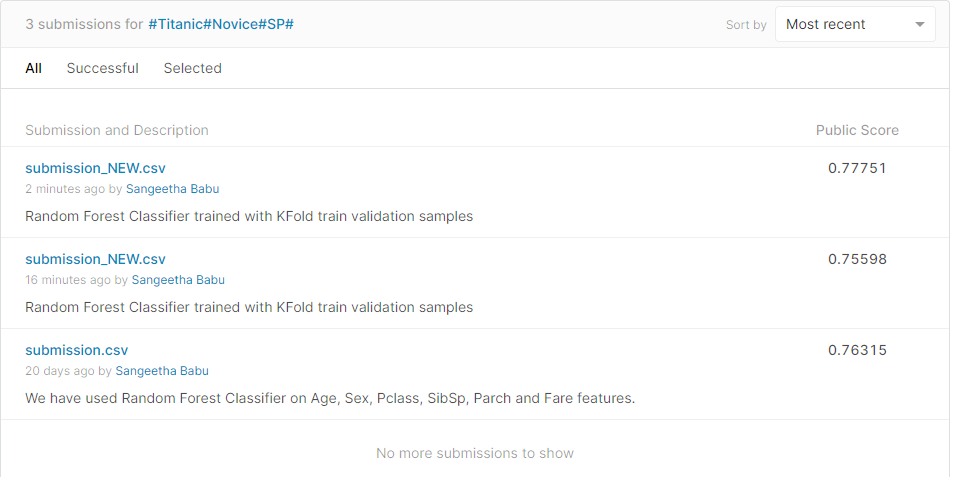


Old leaderboard screenshot:

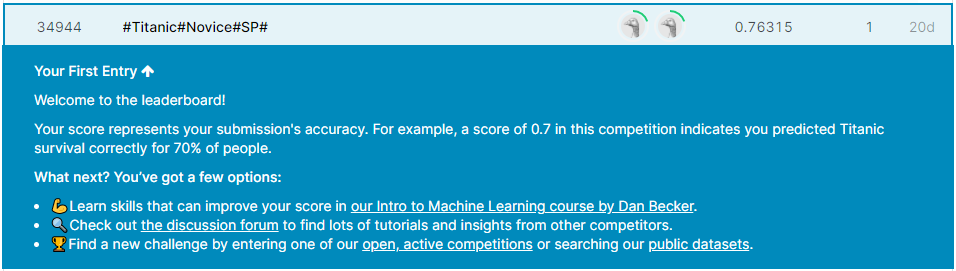


New leaderboard screenshot:

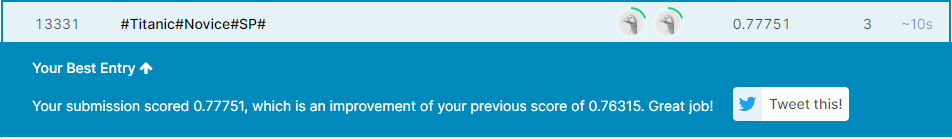



## 4.3 Conclusion and Learnings



### 4.3.1 Conclusion

*  We used the Titanic dataset to predict the survival of passengers given their features like Name, Age, Sex, count of family members, ticket, etc. 

*  We used Age, SibSp, Parch, Fare, Pclass, Sex, Embarked as features to train our ML models because these features had some impact on Survival.

*  We trained Random Forest Classifier and predicted for test data with an accuracy of 0.763

*  To find the best fit model, we trained the data on Support Vector Classifier and compared the mean accuracies of both the models.

*  Mean accuracy of Random Forest Classifier (0.8171) was better than Support Vector Classifier (0.7161)

*  Hypothesis testing was conducted for both the models using accuracies from KFold Sampling and the null-hypothesis was rejected since the p-value (0.0112) was less than 0.05

*  Therefore we are 95% confident that Random Forest Classifier will perform better than Support Vector Classifier in the future for the Titanic data obtained from the Titanic Shipwreck on April 15, 1912.

We were able to get an accuracy of 0.7751 for the test data using Random Forest Classifier.

### 4.3.2 Learnings from the project

Following are the learnings from this project:
*   We understood about the data properties and how to analyze the data in the first step of Data Science Life Cycle.
*   Explorative Data Analysis and Visualizations helped us to understand the relationship between different features.
*   Handling missing values was in-fact the tedious part and we imputed those with mean values of the sub-categories under which they fall.
*   We used Random Forest Classifier in the Prediction phase of Data Science Life Cycle, and used Stratified sampling to maintain the same ratio of prediction feature (Survived column) across train and test.
*   We also fine-tuned the Random Forest Classifier for n-estimators (hyper-parameter) by comparing the accuracy for different n-estimators values.
*   We compared the accuracies of Support Vector Classifier with Random Forest Classifier using t-test and hypothesis testing for the Inference



# **5. Reference Links**

[1] https://www.history.com/this-day-in-history/titanic-sinks

[2] https://en.wikipedia.org/wiki/Passengers_of_the_Titanic

[3] https://www.britannica.com/topic/Titanic

Random Forest Classifier Implementation links:

[4] https://youtu.be/MxiktOPmhV8

[5] https://youtu.be/FM4srNwwXtE

[6] https://towardsdatascience.com/a-beginners-guide-to-kaggle-s-titanic-problem-3193cb56f6ca